In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv(r"C:\Users\Ritesh\Downloads\Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.rename(columns = {'Genre': 'Gender'},inplace = True)
df.rename(columns = {'Annual Income (k$)': 'Annual Income'},inplace = True)
df.rename(columns = {'Spending Score (1-100)': 'Spending Score'},inplace = True)
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'Spending Score')

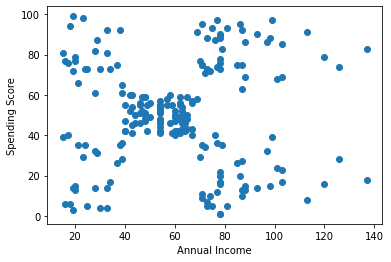

In [13]:
plt.scatter(df['Annual Income'],df['Spending Score'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [16]:
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(df[['Annual Income','Spending Score']])
y_predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [17]:
df['clusters'] = y_predicted
df

,CustomerID,Gender,Age,Annual Income,Spending Score,clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [20]:
df.clusters.unique()

array([3, 4, 1, 0, 2])

In [21]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [22]:
centroids = np.array(km.cluster_centers_)
centroids

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

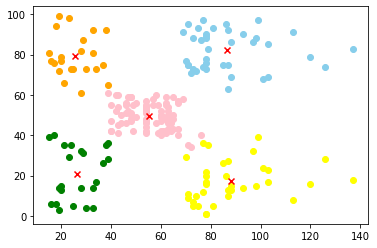

In [25]:
df1 = df[df.clusters == 0]
df2= df[df.clusters == 1]
df3= df[df.clusters == 2]
df4= df[df.clusters == 3]
df5= df[df.clusters == 4]
plt.scatter(df1['Annual Income'],df1['Spending Score'],color = "skyblue")
plt.scatter(df2['Annual Income'],df2['Spending Score'],color = "pink")
plt.scatter(df3['Annual Income'],df3['Spending Score'],color = "yellow")
plt.scatter(df4['Annual Income'],df4['Spending Score'],color = "green")
plt.scatter(df5['Annual Income'],df5['Spending Score'],color = "orange")
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r')

In [37]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [38]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    


C:\Users\Ritesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


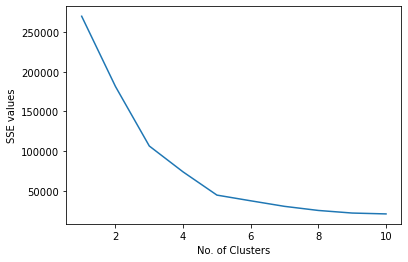

In [39]:
plt.plot(range(1,11),sse)
plt.xlabel("No. of Clusters")
plt.ylabel("SSE values")
plt.show()